In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)

    def sigmoid(self, x):
        # https://en.wikipedia.org/wiki/Sigmoid_function
        return 1 / (1 + np.exp(-x))

    def sigmoid_prime(self, x):
        # https://www.geeksforgeeks.org/derivative-of-the-sigmoid-function/
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def forward(self, X):
        self.z = np.dot(X, self.W1)
        self.a = self.sigmoid(self.z)
        self.output = np.dot(self.a, self.W2)
        return self.output

    def backward(self, X, y, output):
        self.output_error = output - y
        self.output_delta = self.output_error
        self.z_error = np.dot(self.output_delta, self.W2.T)
        self.z_delta = self.z_error * self.sigmoid_prime(self.z)
        self.W1 -= np.dot(X.T, self.z_delta)
        self.W2 -= np.dot(self.a.T, self.output_delta)

    def train(self, X, y, epochs):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)


In [3]:
def polynomial(x):
    # 4th order polynomial
    return x**4 - 4*x**3 + 4*x**2 - 4*x + 1

In [4]:
def dpolynomial(x):
    # Derivative of the polynomial
    return 4*x**3 - 12*x**2 + 8*x - 4

In [5]:
def gradient_descent(f, df, x0, learning_rate, num_iterations):
    x = x0
    for _ in range(num_iterations):
        x = x - learning_rate * df(x)
    return x


In [6]:
def main():
    nn = SimpleNN(2, 3, 1)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])
    nn.train(X, y, 1000)

    x0 = 0
    min_x = gradient_descent(polynomial, dpolynomial, x0, 0.01, 1000)
    print(f"Minimum of polynomial found at x = {min_x}")

    x = np.linspace(-1, 3, 100)
    y = polynomial(x)
    plt.plot(x, y)
    plt.plot(min_x, polynomial(min_x), 'ro')
    plt.title("4th Order Polynomial")
    plt.show()

Minimum of polynomial found at x = 2.3247179572447445


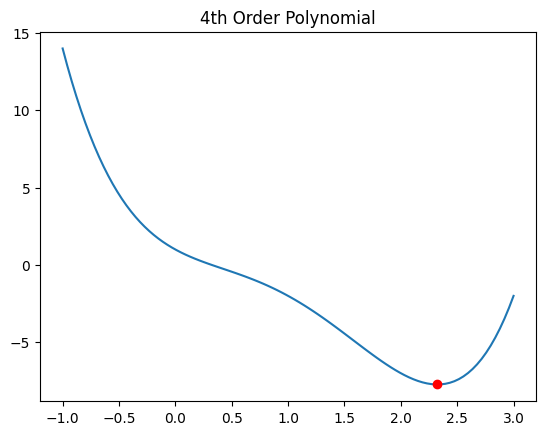

In [7]:
if __name__ == "__main__":
    main()